## Observations and Insights 

#1) Mouse weight and tumor volume is positively correlated to each other. The mouse having high weight have large tumor
#2) Capomulin drug is one of the best performing drug. The tumor reduced significantly for the mouse in 45 days timepoint
#3) Number of male mice used for study is slightly higher than number of female mice used
#4) As per study results, Capomulin and Ramicane drug looks to be best performing drug to treat tumor

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
# Checking the number of mice in the DataFrame.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_results['Mouse ID'].value_counts().head()

g989    13
i738    10
l509    10
v991    10
u364    10
Name: Mouse ID, dtype: int64

In [4]:
# Mouse ID g989 has duplicate rows. Removing g989 rows from the data frame.
study_results = study_results.set_index("Mouse ID")
# Optional: Get all the data for the duplicate mouse ID. 
study_results_droppedIndexData = study_results.loc['g989', :]
study_results_droppedIndexData.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
g989,0,45.000000,0
g989,0,45.000000,0
g989,5,48.786801,0
g989,5,47.570392,0
g989,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results = study_results.drop(index = "g989")

In [6]:
# Checking the number of mice in the clean DataFrame.
study_results = study_results.reset_index()
study_results['Mouse ID'].value_counts().head()

i738    10
l509    10
c832    10
v991    10
u364    10
Name: Mouse ID, dtype: int64

In [7]:
# Combine the data into a single dataset
combined_mice_study_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mice_study_results.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

mice_grouped = combined_mice_study_results.groupby("Drug Regimen")
mice_statistics_table = mice_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

mice_statistics_table = mice_statistics_table.rename(columns={"mean":"Mean",
                                                              "Median":"Median",
                                                              "var":"Variance",
                                                              "std" : "Standard Deviation",
                                                              "sem" : "SEM"})

mice_statistics_table

,Mean,median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
mice_grouped_timepoint =mice_grouped["Timepoint"].value_counts() # to get mice count for each timepoint grouped by drug name


## Bar Plots

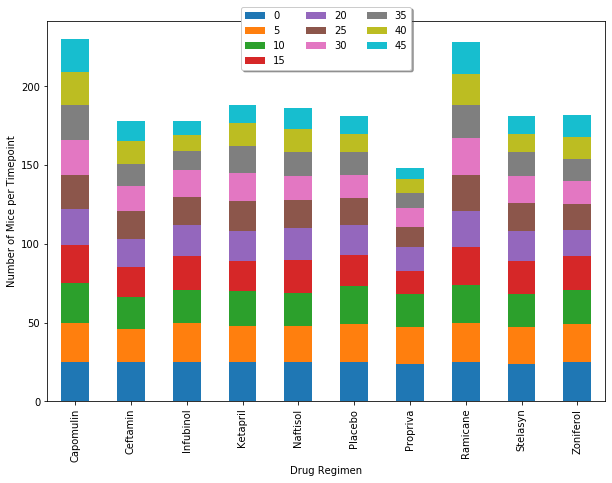

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Generate a stacked bar plot to stack mice count for each timepoint for 1 drug regimen on top of each other

Mice_counts_PerTimepoint_chart = mice_grouped_timepoint.unstack().plot(kind='bar',stacked=True, figsize=(10,7) )

Mice_counts_PerTimepoint_chart.set_xlabel("Drug Regimen")
Mice_counts_PerTimepoint_chart.set_ylabel("Number of Mice per Timepoint")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [11]:
Unique_drugRegimen_values = combined_mice_study_results["Drug Regimen"].unique() # Unique list of drug names for x axis ticks
Unique_drugRegimen_values = sorted(Unique_drugRegimen_values)
Unique_Timepoint_values = combined_mice_study_results["Timepoint"].unique() # Unique list of timepoint used for looping and creating each bar list
mice_grouped_timepoint = combined_mice_study_results.groupby(["Timepoint"])

# to get mice count for each timepoint grouped by sorted drug name
mice_grouped_drug_regimen =mice_grouped_timepoint["Drug Regimen"].value_counts().sort_index().to_list() 



In [12]:
# Logic to create a mice count list for timpoint 0 for all drug regimen. Add that micecount_pertimepoint_list to combined_micecount_list
# similarly creating a mice count list for timepoint 5 and so on
# combined_micecount_list will have 10 lists at the end- one for each timepoint

counter = 0
combined_micecount_list = []
x_axis = np.arange(len(Unique_drugRegimen_values))

for i in range(len(Unique_drugRegimen_values)): # loop 10 times for each drug
    micecount_pertimepoint_list = []
    for j in range(len(Unique_Timepoint_values)): # Inner loop 10 times for each timepoint of that drug
        
        #print("Value = " + str(mice_grouped_drug_regimen[counter]) + "counter = " + str(counter))
        micecount_pertimepoint_list.append(mice_grouped_drug_regimen[counter])
        counter = counter + 1
    
    combined_micecount_list.append(micecount_pertimepoint_list)



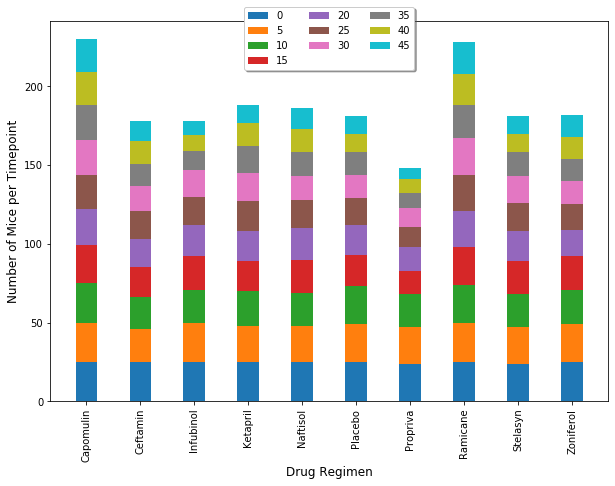

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


data = np.array(combined_micecount_list)

color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'] # colors to use for each timepoint bar 
fig = plt.gcf()
fig.set_size_inches(10, 7)
width = 0.4



X = np.arange(data.shape[1])
for i in range(data.shape[0]):  #loop for each timepoint to create stacked bar plot
  plt.bar(X, data[i],width, bottom = np.sum(data[:i], axis = 0), color = color_list[i % len(color_list)])

plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice per Timepoint', fontsize=12)
plt.xticks(X, Unique_drugRegimen_values,rotation=90)
plt.legend(Unique_Timepoint_values,loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.show()

# Pie Plots

In [14]:
# Get rows of timepoint 0 for each drug

filtered = combined_mice_study_results.loc[(combined_mice_study_results["Timepoint"] == 0)] 
mice_grouped_sex_count = filtered["Sex"].value_counts() # calculate female and male mice count

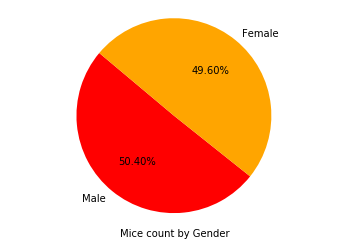

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["red", "orange"]
mice_grouped_sex_count.plot(kind='pie', subplots=True, colors = colors, autopct="%.2f%%", startangle=140)
plt.axis('equal')
plt.xlabel("Mice count by Gender")
plt.ylabel("")
plt.show()

In [16]:
Unique_micesex_values = combined_mice_study_results["Sex"].unique()

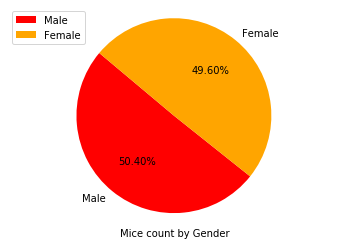

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = Unique_micesex_values
sizes = mice_grouped_sex_count
colors = ["red", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.2f%%", startangle=140)
plt.axis("equal")
plt.xlabel("Mice count by Gender")
plt.ylabel("")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate final tumor volume of each mouse for drug Capomulin

# get all rows of drug "Capomulin"
Capomulin_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin")]

# get sorted unique mouse id for drug capomulin
Capomulin_Micecount = Capomulin_filtered_df["Mouse ID"].unique()
Capomulin_Micecount = sorted(Capomulin_Micecount)

Capomulin_filtered_df = Capomulin_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

# group the rows of drug "Capomulin" by MouseID and then get last timepoint for each Mouse
Capomulin_filtered_df_grouped = Capomulin_filtered_df.groupby("Mouse ID")
TimepointMaxList = Capomulin_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Capomulin_tumorVol_list = []

# add the final tumor volumne of last timepoint for each mouse in a list

for x in range(len(Capomulin_Micecount)):
    Capomulin_Mice_df = Capomulin_filtered_df.loc[(Capomulin_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Capomulin_filtered_df["Mouse ID"] == Capomulin_Micecount[x])]
    tumorvolume = round(float(Capomulin_Mice_df["Tumor Volume (mm3)"]),2)
    Capomulin_tumorVol_list.append(tumorvolume)
Capomulin_tumorVol_list.sort()
Capomulin_tumorVol_df = pd.DataFrame(Capomulin_tumorVol_list, columns=['TumorVol'] )

In [19]:
# Calculate final tumor volume of each mouse for drug Ramicane

# get all rows of drug "Ramicane"
Ramicane_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Ramicane")]

# get sorted unique mouse id for drug Ramicane
Ramicane_Micecount = Ramicane_filtered_df["Mouse ID"].unique()
Ramicane_Micecount = sorted(Ramicane_Micecount)

Ramicane_filtered_df = Ramicane_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

Ramicane_filtered_df_grouped = Ramicane_filtered_df.groupby("Mouse ID")
TimepointMaxList = Ramicane_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Ramicane_tumorVol_list = []

# add the final tumor volumne of last timepoint for each mouse in a list

for x in range(len(Ramicane_Micecount)):
    Ramicane_Mice_df = Ramicane_filtered_df.loc[(Ramicane_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Ramicane_filtered_df["Mouse ID"] == Ramicane_Micecount[x])]
    tumorvolume = round(float(Ramicane_Mice_df["Tumor Volume (mm3)"]),5)
    Ramicane_tumorVol_list.append(tumorvolume)
Ramicane_tumorVol_list.sort()
Ramicane_tumorVol_df = pd.DataFrame(Ramicane_tumorVol_list, columns=['TumorVol'] )

In [20]:
# Calculate final tumor volume of each mouse for drug Infubinol

# get all rows of drug "Infubinol"
Infubinol_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Infubinol")]

# get sorted unique mouse id for drug Infubinol
Infubinol_Micecount = Infubinol_filtered_df["Mouse ID"].unique()
Infubinol_Micecount = sorted(Infubinol_Micecount)

Infubinol_filtered_df = Infubinol_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

Infubinol_filtered_df_grouped = Infubinol_filtered_df.groupby("Mouse ID")
TimepointMaxList = Infubinol_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Infubinol_tumorVol_list = []

# add the final tumor volumne of last timepoint for each mouse in a list

for x in range(len(Infubinol_Micecount)):
    Infubinol_Mice_df = Infubinol_filtered_df.loc[(Infubinol_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Infubinol_filtered_df["Mouse ID"] == Infubinol_Micecount[x])]
    tumorvolume = round(float(Infubinol_Mice_df["Tumor Volume (mm3)"]),5)
    Infubinol_tumorVol_list.append(tumorvolume)
Infubinol_tumorVol_list.sort()
Infubinol_tumorVol_df = pd.DataFrame(Infubinol_tumorVol_list, columns=['TumorVol'] )

In [21]:
# Calculate final tumor volume of each mouse for drug Ceftamin

# get all rows of drug "Ceftamin"
Ceftamin_filtered_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Ceftamin")]

# get sorted unique mouse id for drug Infubinol
Ceftamin_Micecount = Ceftamin_filtered_df["Mouse ID"].unique()
Ceftamin_Micecount = sorted(Ceftamin_Micecount)

Ceftamin_filtered_df = Ceftamin_filtered_df[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]

Ceftamin_filtered_df_grouped = Ceftamin_filtered_df.groupby("Mouse ID")
TimepointMaxList = Ceftamin_filtered_df_grouped["Timepoint"].max().sort_index().to_list() # get maximum timepoint value for each mouse ID
Ceftamin_tumorVol_list = []

for x in range(len(Ceftamin_Micecount)):
    Ceftamin_Mice_df = Ceftamin_filtered_df.loc[(Ceftamin_filtered_df["Timepoint"] == TimepointMaxList[x]) & (Ceftamin_filtered_df["Mouse ID"] == Ceftamin_Micecount[x])]
    tumorvolume = round(float(Ceftamin_Mice_df["Tumor Volume (mm3)"]),5)
    Ceftamin_tumorVol_list.append(tumorvolume)
Ceftamin_tumorVol_list.sort()
Ceftamin_tumorVol_df = pd.DataFrame(Ceftamin_tumorVol_list, columns=['TumorVol'] )

In [22]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for drug "Capomulin"

lowerq = float(Capomulin_tumorVol_df.quantile(0.25))
upperq = float(Capomulin_tumorVol_df.quantile(0.75))
median = float(Capomulin_tumorVol_df.quantile(0.5))
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin final tumor volume is: {iqr}")
print(f"The median of Capomulin tumor volume is: {median} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = Capomulin_tumorVol_df.loc[(Capomulin_tumorVol_df['TumorVol'] < lower_bound) | (Capomulin_tumorVol_df['TumorVol'] > upper_bound)]
if len(outlier_occupancy) == 0:
    print("There are no potential outliers for drug Capomulin")
else:
    print("There are following potential outliers for drug Capomuin")
    print(outlier_occupancy["TumorVol"])

The lower quartile of Capomulin final tumor volume is: 32.38
The upper quartile of Capomulin final tumor volume is: 40.16
The interquartile range of Capomulin final tumor volume is: 7.779999999999994
The median of Capomulin tumor volume is: 38.13 
Values below 20.71000000000001 could be outliers.
Values above 51.829999999999984 could be outliers.
There are no potential outliers for drug Capomulin


In [23]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for drug "Ramicane"

lowerq = float(Ramicane_tumorVol_df.quantile(0.25))
upperq = float(Ramicane_tumorVol_df.quantile(0.75))
median = float(Ramicane_tumorVol_df.quantile(0.5))
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane final tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane final tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane final tumor volume is: {iqr}")
print(f"The median of Ramicane tumor volume is: {median} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = Ramicane_tumorVol_df.loc[(Ramicane_tumorVol_df['TumorVol'] < lower_bound) | (Ramicane_tumorVol_df['TumorVol'] > upper_bound)]
if len(outlier_occupancy) == 0:
    print("There are no potential outliers for drug Ramicane")
else:
    print("There are following potential outliers for drug Ramicane")
    print(outlier_occupancy["TumorVol"])

The lower quartile of Ramicane final tumor volume is: 31.56047
The upper quartile of Ramicane final tumor volume is: 40.65901
The interquartile range of Ramicane final tumor volume is: 9.098540000000003
The median of Ramicane tumor volume is: 36.56165 
Values below 17.912659999999995 could be outliers.
Values above 54.30682000000001 could be outliers.
There are no potential outliers for drug Ramicane


In [24]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for drug "Infubinol"

lowerq = float(Infubinol_tumorVol_df.quantile(0.25))
upperq = float(Infubinol_tumorVol_df.quantile(0.75))
median = float(Infubinol_tumorVol_df.quantile(0.5))
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol final tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol final tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol final tumor volume is: {iqr}")
print(f"The median of Infubinol tumor volume is: {median} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = Infubinol_tumorVol_df.loc[(Infubinol_tumorVol_df['TumorVol'] < lower_bound) | (Infubinol_tumorVol_df['TumorVol'] > upper_bound)]
if len(outlier_occupancy) == 0:
    print("There are no potential outliers for drug Infubinol")
else:
    print("There are following potential outliers for drug Infubinol")
    print(outlier_occupancy["TumorVol"])
    

The lower quartile of Infubinol final tumor volume is: 54.04861
The upper quartile of Infubinol final tumor volume is: 65.52574
The interquartile range of Infubinol final tumor volume is: 11.477130000000002
The median of Infubinol tumor volume is: 60.16518 
Values below 36.83291499999999 could be outliers.
Values above 82.741435 could be outliers.
There are following potential outliers for drug Infubinol
0    36.32135
Name: TumorVol, dtype: float64


In [25]:
#Calculate the IQR and quantitatively determine if there are any potential outliers for drug "Ceftamin"

lowerq = float(Ceftamin_tumorVol_df.quantile(0.25))
upperq = float(Ceftamin_tumorVol_df.quantile(0.75))
median = float(Ceftamin_tumorVol_df.quantile(0.5))
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin final tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin final tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin final tumor volume is: {iqr}")
print(f"The median of Ceftamin tumor volume is: {median} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = Ceftamin_tumorVol_df.loc[(Ceftamin_tumorVol_df['TumorVol'] < lower_bound) | (Ceftamin_tumorVol_df['TumorVol'] > upper_bound)]
if len(outlier_occupancy) == 0:
    print("There are no potential outliers for drug Ceftamin")
else:
    print("There are following potential outliers for drug Ceftamin")
    print(outlier_occupancy["TumorVol"])


The lower quartile of Ceftamin final tumor volume is: 48.72208
The upper quartile of Ceftamin final tumor volume is: 64.29983
The interquartile range of Ceftamin final tumor volume is: 15.577750000000002
The median of Ceftamin tumor volume is: 59.85196 
Values below 25.355454999999996 could be outliers.
Values above 87.666455 could be outliers.
There are no potential outliers for drug Ceftamin


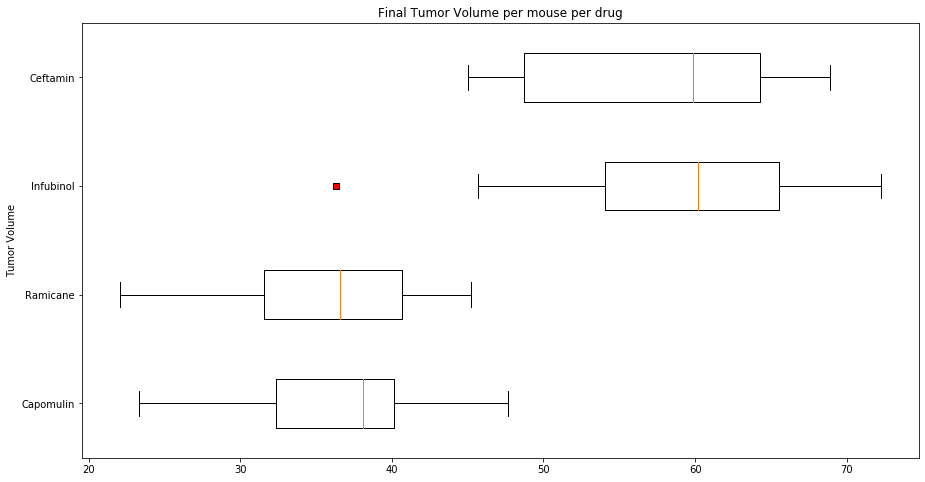

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [Capomulin_tumorVol_list, Ramicane_tumorVol_list, Infubinol_tumorVol_list, Ceftamin_tumorVol_list] #combine data of 4 drug regimens

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per mouse per drug')
ax1.set_ylabel('Tumor Volume')
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(data_to_plot, vert=False, flierprops=red_square)
plt.yticks([1, 2, 3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
fig1.set_size_inches(15, 8)
plt.show()

## Line and Scatter Plots

In [27]:
# Get unique mouse ID for drug "Capomulin"
Capomulin_uniqueMouseIds = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin")]["Mouse ID"].unique()

# Get rows for first mouse ID retruned for drug "Capomulin"
Filters_Drug_df = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin") & (combined_mice_study_results["Mouse ID"] == Capomulin_uniqueMouseIds[0])]

Filters_Drug_df = Filters_Drug_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
x_axis_data = np.arange(0,max(Filters_Drug_df["Timepoint"]) + 5,5)
points = Filters_Drug_df["Tumor Volume (mm3)"]

Filters_Drug_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
10,Capomulin,s185,0,45.000000
11,Capomulin,s185,5,43.878496
12,Capomulin,s185,10,37.614948
13,Capomulin,s185,15,38.177232
14,Capomulin,s185,20,36.866876
15,Capomulin,s185,25,33.949940
16,Capomulin,s185,30,32.959671
17,Capomulin,s185,35,28.328531
18,Capomulin,s185,40,25.472143
19,Capomulin,s185,45,23.343598


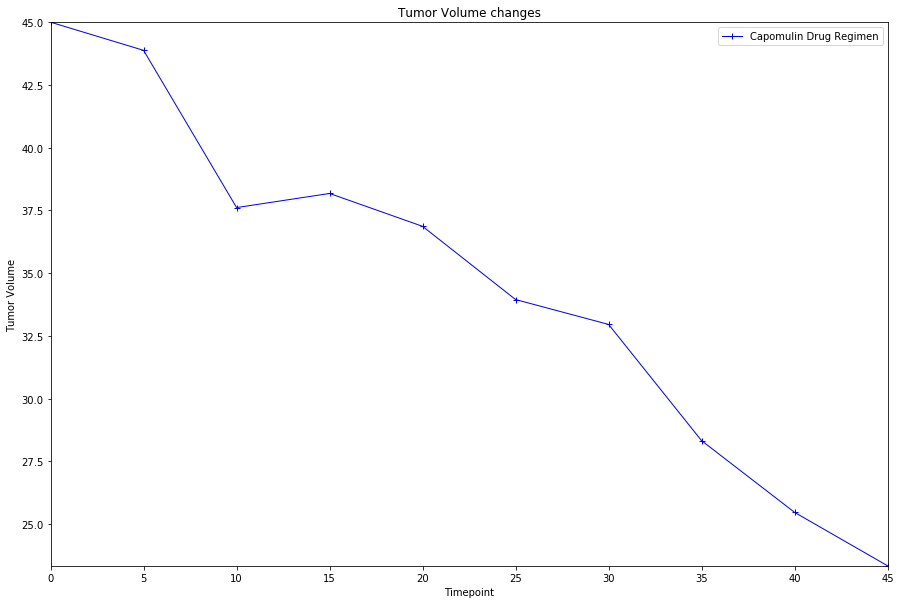

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(x_axis_data, points,marker="+",color="blue", linewidth=1, label='Capomulin Drug Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title("Tumor Volume changes")
plt.legend()
plt.xlim(0,max(Filters_Drug_df["Timepoint"]))
plt.ylim(min(Filters_Drug_df["Tumor Volume (mm3)"]),max(Filters_Drug_df["Tumor Volume (mm3)"]))
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [29]:
# get all rows for drug "Capomulin"

Filtered_drug_allData = combined_mice_study_results.loc[(combined_mice_study_results["Drug Regimen"] == "Capomulin")]
Filtered_drug_allData = Filtered_drug_allData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Filtered_drug_allData_grouped= Filtered_drug_allData.groupby("Mouse ID")
Mouse_weight_data = Filtered_drug_allData_grouped["Weight (g)"].max() # get mouse weight for each mice used to study drug "Capomulin"
Avg_Tumor_data = Filtered_drug_allData_grouped["Tumor Volume (mm3)"].mean() # get average tumor volume for each mice


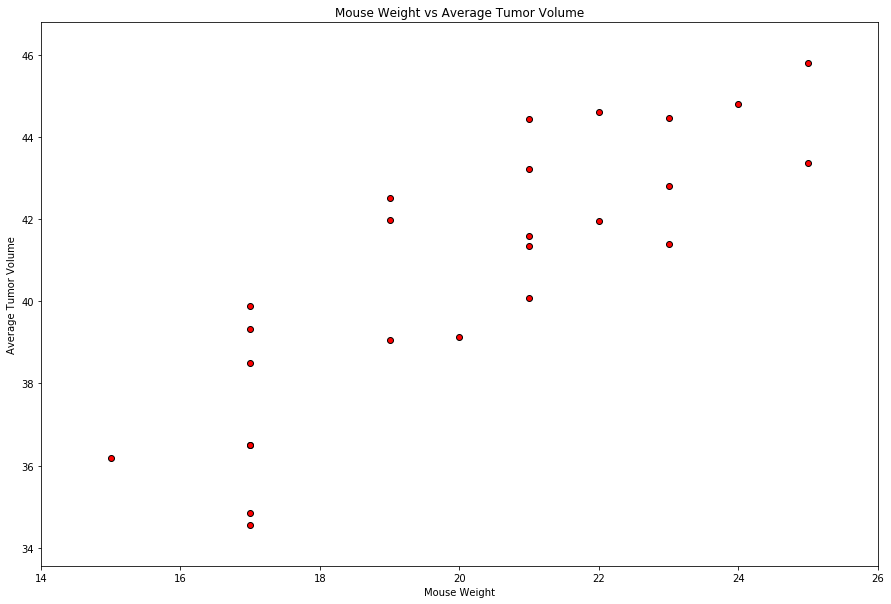

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(Mouse_weight_data, Avg_Tumor_data, marker="o", facecolors="red", edgecolors="black")

plt.ylim(min(Avg_Tumor_data) - 1,max(Avg_Tumor_data) + 1)
plt.xlim(min(Mouse_weight_data) -1,max(Mouse_weight_data) + 1)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
fig = plt.gcf()
fig.set_size_inches(15, 10)




## Correlation and Regression

In [31]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(Mouse_weight_data,Avg_Tumor_data)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


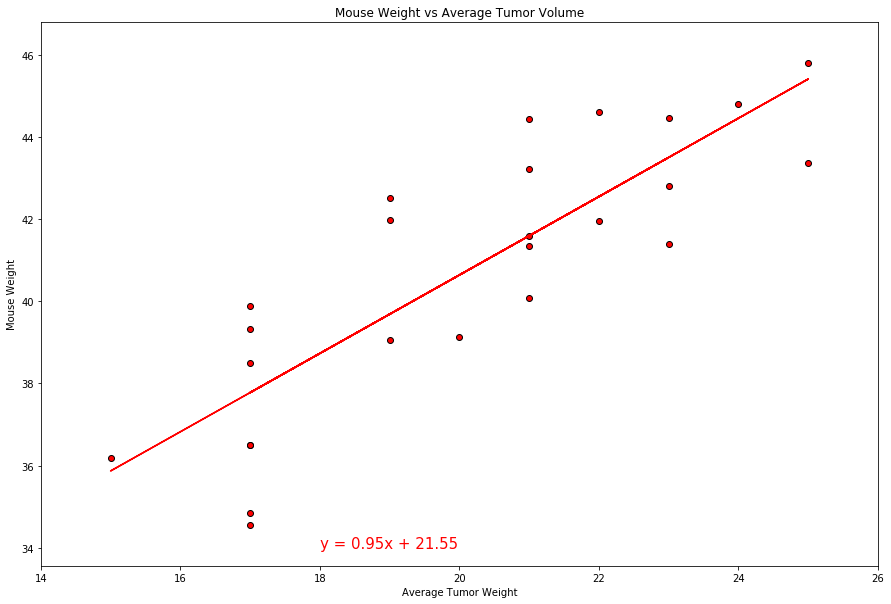

In [32]:
# Add the linear regression equation and line to plot
#  Calculate and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 

x_values = Mouse_weight_data
y_values = Avg_Tumor_data
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
fig = plt.gcf()
plt.ylim(min(Avg_Tumor_data) - 1,max(Avg_Tumor_data) + 1)
plt.xlim(min(Mouse_weight_data) - 1,max(Mouse_weight_data) + 1)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,34),fontsize=15,color="red")
plt.ylabel('Mouse Weight')
plt.xlabel('Average Tumor Weight')
fig.set_size_inches(15, 10)
plt.show()


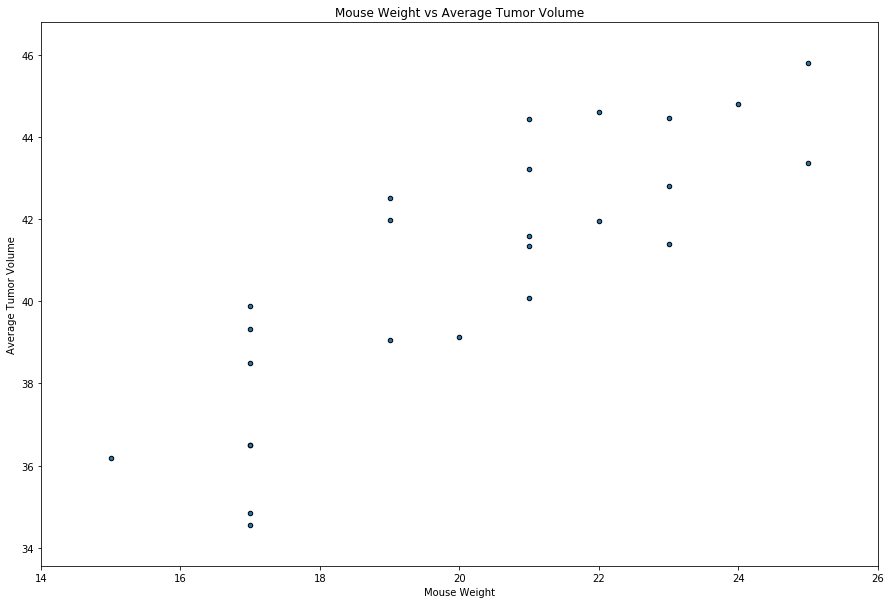

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen using pandas
Filtered_drug_allData_grouped1 = Filtered_drug_allData_grouped
Filtered_drug_allData_grouped1 = Filtered_drug_allData_grouped1.agg("mean")
Filtered_drug_allData_grouped1.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",  figsize=(15,10),
                                    marker="o", facecolors="red", edgecolors="black")

plt.ylim(min(Avg_Tumor_data) - 1,max(Avg_Tumor_data) + 1)
plt.xlim(min(Mouse_weight_data) -1,max(Mouse_weight_data) + 1)
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()
